In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

# 1 Dimension

## Parameters, derivative stencil, and Hamiltonian

In [3]:
N = 2**10 
x = np.linspace(-3,3,N)
h = 6/N # step-size

In [4]:
row = np.array([-2,1] + [0 for i in range(N-3)] + [1])
D2 = [row]

for i in range(1,N):
    row = np.roll(row,1)
    D2.append(row)

D2 = np.array(D2) # Second derivative matrix

In [5]:
# Boundary conndition
D2[0,N-1] = 0 
D2[N-1,0] = 0

## Infinite Potential Well

In [16]:
V = np.zeros(x.shape) 

H = -D2/(h**2) + np.diag(V) # Hamiltonian

E, v = LA.eig(H) # Solution

Psi = {}

sorted_indices = np.argsort(E)
E = [E[i] for i in sorted_indices]
Psi = [v[:,i] for i in sorted_indices]

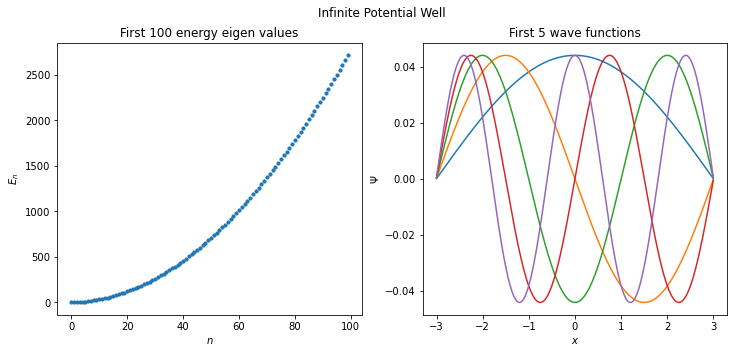

In [32]:
E = E[:100]
f = plt.figure(figsize=(12, 5)); 

f.add_subplot(1,2,1)
plt.scatter(list(range(len(E))),E, s=10)
plt.xlabel('$n$')
plt.ylabel('$E_n$')
plt.title('First 100 energy eigen values')

f.add_subplot(1,2,2)

for i in range(5):
    Psi[i] = -Psi[i] if Psi[i][2]<0 else Psi[i]
    plt.plot(x, Psi[i], label=str(i))
# plt.legend(['$\Psi_'+str(i)+'$' for i in range(5)])
plt.xlabel('$x$')
plt.ylabel('$\Psi$')
plt.title('First 5 wave functions');

plt.suptitle('Infinite Potential Well');

## Harmonic Potential Well

In [33]:
V = 100 * x**2

H = -D2/(h**2) + np.diag(V)

E, v = LA.eig(H)

Psi = {}

sorted_indices = np.argsort(E)
E = [E[i] for i in sorted_indices]
Psi = [v[:,i] for i in sorted_indices]

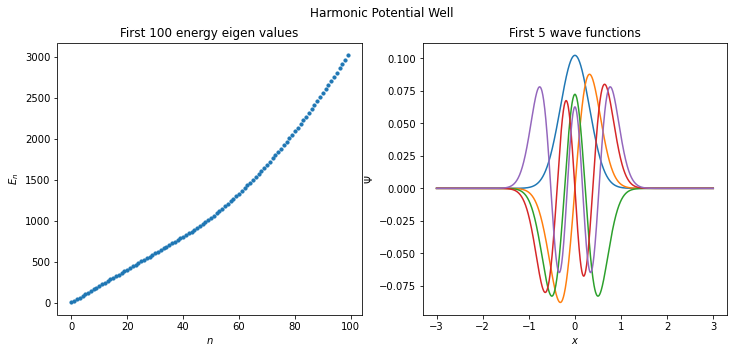

In [36]:
E = E[:100]
f = plt.figure(figsize=(12, 5)); 

f.add_subplot(1,2,1)
plt.scatter(list(range(len(E))),E, s=10)
plt.xlabel('$n$')
plt.ylabel('$E_n$')
plt.title('First 100 energy eigen values')

f.add_subplot(1,2,2)

for i in range(5):
    plt.plot(x, Psi[i], label=str(i))

plt.xlabel('$x$')
plt.ylabel('$\Psi$')
plt.title('First 5 wave functions');

plt.suptitle('Harmonic Potential Well');

# 2 Dimensions

## Parameters, derivative stencil, and Hamiltonian

In [2]:
N = 2**5
x = np.linspace(-1,1,N); y = x;

xx, yy = np.meshgrid(x, y)

h = 2/N

In [3]:
row = np.array([-2,1] + [0 for i in range(N-3)] + [1])
D2 = [row]

for i in range(1,N):
    row = np.roll(row,1)
    D2.append(row)

D2 = np.array(D2)

D2[0,N-1] = 0
D2[N-1,0] = 0

Del_2 = (np.kron(D2, np.eye(N)) + np.kron(np.eye(N), D2))/(h**2)

## 2d Harmonic Potential Well

In [4]:
V  = xx**2 + yy**2

H = -Del_2 + np.diag(V.flatten())

E, v = LA.eig(H)

Psi = {}

sorted_indices = np.argsort(E)
E = [E[i] for i in sorted_indices]
Psi = [v[:,i].reshape(N, N) for i in sorted_indices]

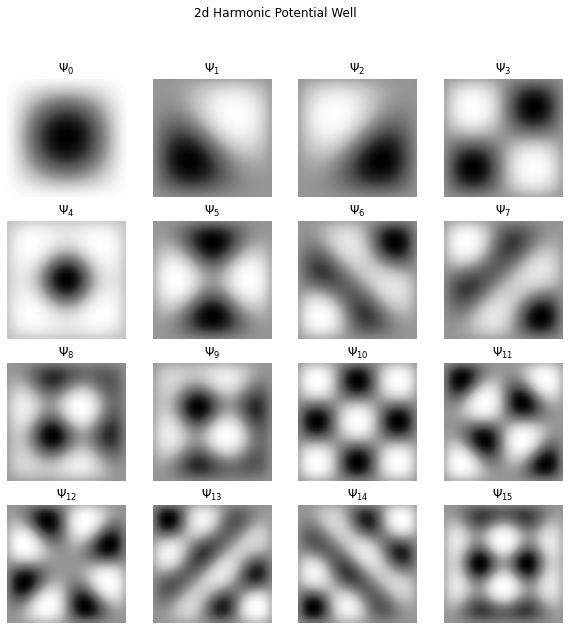

In [5]:
f = plt.figure(figsize=(10, 10)); 

for i in range(16):
    f.add_subplot(4,4,i+1)

    plt.imshow( Psi[i], cmap='Greys',  interpolation = 'bilinear')

    plt.axis('off')
    plt.title(r'$\Psi_{{{}}}$'.format(i));

plt.suptitle('2d Harmonic Potential Well');

# 3 Dimensions

## Parameters, derivative stencil, and Hamiltonian

In [34]:
N = 2**4
x = np.linspace(-4,4,N); y = x; z = x;

xx, yy, zz = np.meshgrid(x, y, z)

h = 8/N

In [35]:
row = np.array([-2,1] + [0 for i in range(N-3)] + [1])
D2 = [row]

for i in range(1,N):
    row = np.roll(row,1)
    D2.append(row)

D2 = np.array(D2)

D2[0,N-1] = 0
D2[N-1,0] = 0

Del_2 = (np.kron(D2, np.kron(np.eye(N), np.eye(N))) +\
         np.kron(np.eye(N), np.kron(D2, np.eye(N))) +\
         np.kron(np.eye(N), np.kron(np.eye(N), D2)))/(h**2)

## Hydrogen Atom

In [81]:
V  = -10*(xx**2 + yy**2 + zz**2)**(-0.5)

H = -Del_2 + np.diag(V.flatten())

E, v = LA.eig(H)

Psi = {}

sorted_indices = np.argsort(E)
E = [E[i] for i in sorted_indices]
Psi = [v[:,i].reshape(N, N, N) for i in sorted_indices]

In [82]:
from ipywidgets import interact
import ipywidgets as widgets



def plot(y_n):
    f = plt.figure(figsize=(10, 10)); 

    for i in range(16):
        f.add_subplot(4,4,i+1)

        plt.imshow(np.abs(Psi[i])[:, int(y_n-1), :], cmap='Greys',  interpolation = 'bilinear')
        plt.axis('off');
        plt.title(r'$\Psi_{{{}}}$'.format(i));

    plt.suptitle('Hydrogen Atom');
    
interact(plot, y_n = widgets.FloatSlider(value=0, min=1, max=N, step=1))


interactive(children=(FloatSlider(value=1.0, description='y_n', max=16.0, min=1.0, step=1.0), Output()), _dom_…

<function __main__.plot(y_n)>